In [1]:
from sklearn import datasets
iris_data = datasets.load_iris()

In [2]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris_data.data.shape

(150, 4)

In [4]:
print(iris_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
iris_data.target.shape

(150,)

In [6]:
print("Classes to predict:",iris_data.target_names)

Classes to predict: ['setosa' 'versicolor' 'virginica']


In [7]:
X = iris_data.data
y = iris_data.target

In [8]:
from sklearn.model_selection import train_test_split

# split dataset into training set and test set

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

# predict the response for test dataset
y_pred  = clf.predict(X_test)

In [10]:
from sklearn import metrics

print("Accuracy:" , metrics.accuracy_score(y_test, y_pred))  # Ans - 1 --> 100% Classified

Accuracy: 1.0


In [11]:
print(metrics.confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [12]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
clf_entropy = DecisionTreeClassifier (criterion = "entropy")

In [14]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
y_pred =  clf_entropy.predict(X_test)

In [16]:
print("Traning Accuracy(Entropy)", metrics.accuracy_score(y_train, clf_entropy.predict(X_train)))
print("Test Accuracy(Entropy):",metrics.accuracy_score(y_test, y_pred))

Traning Accuracy(Entropy) 1.0
Test Accuracy(Entropy): 1.0


In [17]:
clf_entropy =  DecisionTreeClassifier(criterion = "entropy",min_samples_split = 10)

In [18]:
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

In [19]:
y_pred =  clf_entropy.predict(X_test)

In [20]:
print("Traning Accuracy(Entropy)", metrics.accuracy_score(y_train, clf_entropy.predict(X_train)))
print("Test Accuracy(Entropy):",metrics.accuracy_score(y_test, y_pred))

Traning Accuracy(Entropy) 0.975
Test Accuracy(Entropy): 0.9666666666666667


In [21]:
from sklearn import tree

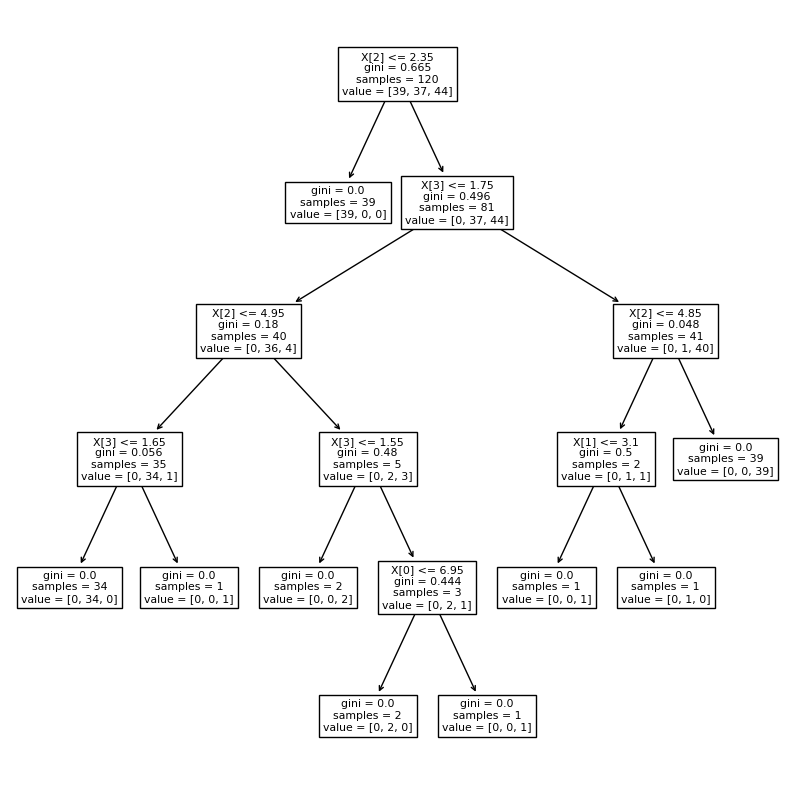

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
tree.plot_tree(clf)
plt.show()

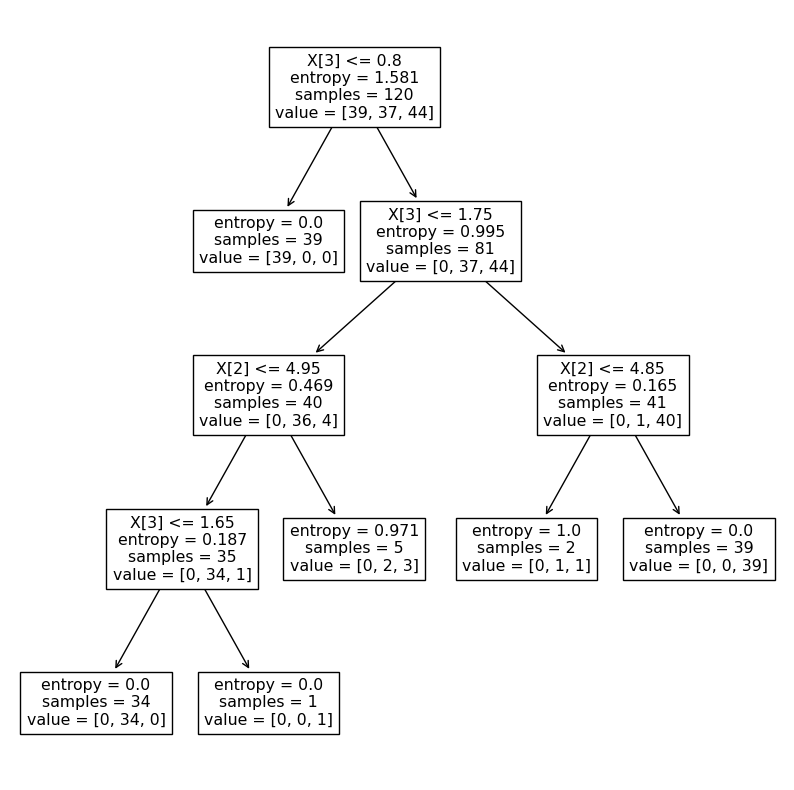

In [23]:
plt.figure(figsize = (10,10))
tree.plot_tree(clf_entropy)
plt.show()

In [ ]:
#!pip install graphviz
!pip install pyparsing
!pip install pydotplus
!conda install graphviz

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
clf,
filled = True,
rounded = True,
class_names = iris_data.feature_names
)

graph = graph_from_dot_data (dot_data)
graph.write_png("tree.png")